In [ ]:
import os  # Provides functions for interacting with the operating system
import cv2  # OpenCV library for image and video processing
import torch  # PyTorch library for deep learning
import imghdr  # Used to determine the type of image contained in a file
import torchvision  # PyTorch library for vision-related tasks
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # Data manipulation and analysis library
import tensorflow as tf  # TensorFlow library for deep learning
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
from sklearn.utils import shuffle # For shuffling dataset
from tensorflow.keras import layers  # Core Keras layers API
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.optimizers import RMSprop  # RMSprop optimizer
from tensorflow.keras.applications import VGG16 # Import pre-trained VGG16 model for feature extraction
from tensorflow.keras.applications.vgg16 import preprocess_input # Function to preprocess input images for VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for image data
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # Metrics for model evaluation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # Core layers for building CNN models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


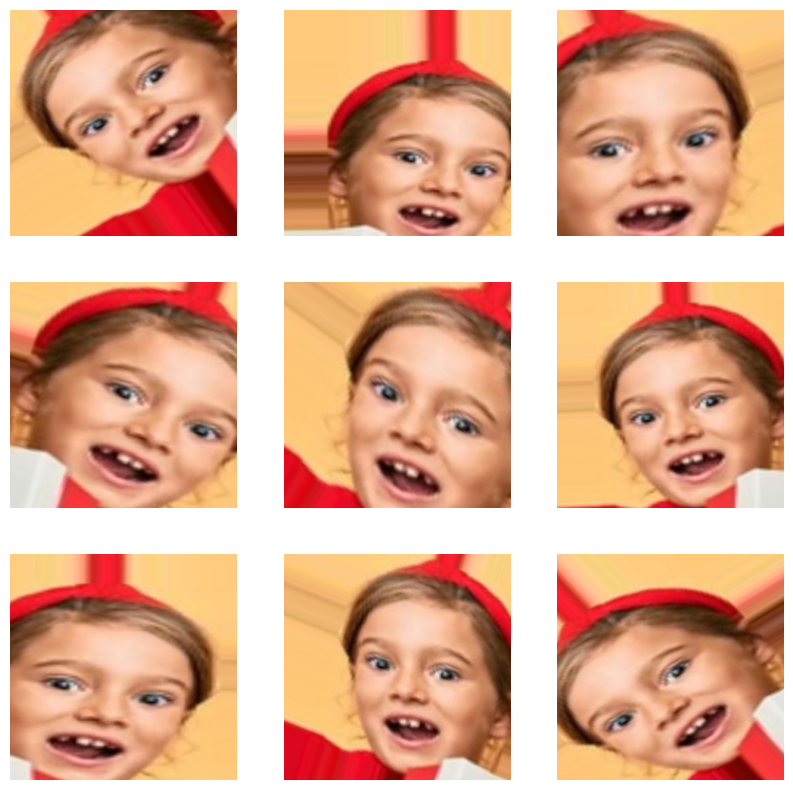

In [3]:
# Define the path to your dataset
image_directory = '/kaggle/input/detection-of-down-syndrome-in-children/healty/healty'
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Optional: Check the file extensions to load only image files (e.g., .jpg, .png)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Load one image (change index to try different images)
if len(image_files) > 0:
    img_path = os.path.join(image_directory, image_files[0])
    img = load_img(img_path)  # Load the image
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape required by Keras

    # Set up image augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        shear_range=0.2,  
        zoom_range=0.2,  
        horizontal_flip=True,  
        fill_mode='nearest'
    )

    # Generate and visualize augmented images
    augmented_images = datagen.flow(img_array, batch_size=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 augmented images
        plt.subplot(3, 3, i + 1)
        batch = augmented_images.__next__()  # Use __next__() to get the next batch of augmented images
        img_plot = array_to_img(batch[0])  # Convert array back to image
        plt.imshow(img_plot)
        plt.axis('off')

    plt.show()
else:
    print("No image files found in the directory.")

In [4]:
# Define the path to your dataset
image_directory = '/kaggle/input/detection-of-down-syndrome-in-children/healty/healty'
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Optional: Check the file extensions to load only image files (e.g., .jpg, .png)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Create a directory to save augmented images
save_directory = '/kaggle/working/augmented_images/'
os.makedirs(save_directory, exist_ok=True)

# Set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'
)

# Loop through all images in the dataset
for image_file in image_files:
    img_path = os.path.join(image_directory, image_file)
    img = load_img(img_path)  # Load the image
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape required by Keras

    # Generate augmented images and save them
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=save_directory, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= 5:  # Save 5 augmented images per original image
            break

print("Image augmentation completed and saved in:", save_directory)


Image augmentation completed and saved in: /kaggle/working/augmented_images/
